<a href="https://colab.research.google.com/github/gorzanskik-ai/statistics/blob/main/04_two_variables_one_chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/statistics/data/yellow_tripdata_2021-05.parquet"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
taxi = pd.read_parquet(path, engine='auto', columns=['trip_distance', 'tpep_pickup_datetime', 'tip_amount', 'fare_amount', 'RatecodeID'], storage_options=None, use_nullable_dtypes=False)
taxi.query("tpep_pickup_datetime >= '2021-05-09' and tpep_pickup_datetime < '2021-05-10'", inplace=True)

In [10]:
taxi.head()

,trip_distance,tpep_pickup_datetime,tip_amount,fare_amount,RatecodeID
565585,9.25,2021-05-09 08:02:47,7.42,26.0,1.0
570958,9.62,2021-05-09 09:22:48,0.00,28.0,1.0
576082,1.49,2021-05-09 09:41:01,2.00,7.0,1.0
576083,14.44,2021-05-09 10:27:38,0.00,40.0,1.0
586667,10.58,2021-05-09 12:00:52,8.22,30.0,1.0


In [11]:
def time_of_day(hour):
    if hour < 6:
        return 'night'
    elif hour < 12:
        return 'morning'
    elif hour < 18:
        return 'afternoon'
    else:
        return 'evening'

In [13]:
def trip_comment(trip_distance):
    if trip_distance < 1:
        return '1-mile'
    elif trip_distance < 2:
        return '2-miles'
    elif trip_distance < 3:
        return '3-miles'
    else:
        return '3+ miles'

In [14]:
taxi['time_of_day'] = taxi['tpep_pickup_datetime'].dt.hour.apply(time_of_day)
taxi['trip_comment'] = taxi['trip_distance'].apply(trip_comment)

In [15]:
taxi.head()

,trip_distance,tpep_pickup_datetime,tip_amount,fare_amount,RatecodeID,time_of_day,trip_comment
565585,9.25,2021-05-09 08:02:47,7.42,26.0,1.0,morning,3+ miles
570958,9.62,2021-05-09 09:22:48,0.00,28.0,1.0,morning,3+ miles
576082,1.49,2021-05-09 09:41:01,2.00,7.0,1.0,morning,2-miles
576083,14.44,2021-05-09 10:27:38,0.00,40.0,1.0,morning,3+ miles
586667,10.58,2021-05-09 12:00:52,8.22,30.0,1.0,afternoon,3+ miles


In [18]:
taxi_s = pd.crosstab(taxi['time_of_day'], taxi['trip_comment'])
taxi_s = taxi_s.reindex(['night', 'morning', 'afternoon', 'evening'])
taxi_s = taxi_s[['1-mile', '2-miles', '3-miles', '3+ miles']]
print(taxi_s)

trip_comment  1-mile  2-miles  3-miles  3+ miles
time_of_day                                     
night            884     1633      987      2464
morning         2505     3924     2145      3805
afternoon       6296     9515     5219      8389
evening         3592     4949     2659      5495


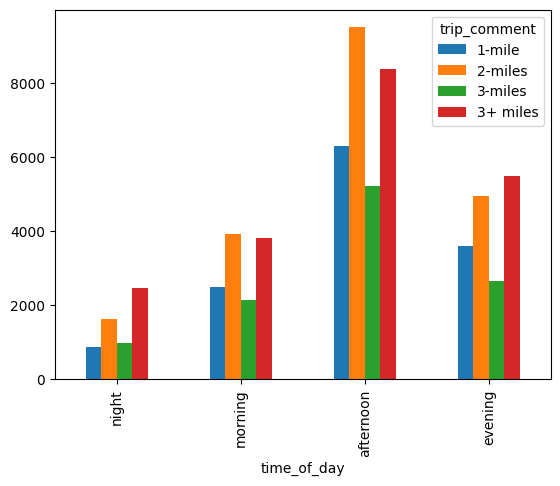

In [19]:
taxi_s.plot.bar()
plt.show()

In [20]:
taxi.query("tip_amount <= 100 and fare_amount > 0 and RatecodeID == 4", inplace=True)
taxi.head()

,trip_distance,tpep_pickup_datetime,tip_amount,fare_amount,RatecodeID,time_of_day,trip_comment
611116,6.07,2021-05-09 00:08:11,4.41,19.5,4.0,night,3+ miles
613423,20.66,2021-05-09 01:37:59,12.86,57.5,4.0,night,3+ miles
613738,44.00,2021-05-09 01:24:40,15.00,98.0,4.0,night,3+ miles
614041,37.70,2021-05-09 01:05:09,1.50,169.0,4.0,night,3+ miles
614945,20.99,2021-05-09 02:10:22,0.00,60.5,4.0,night,3+ miles


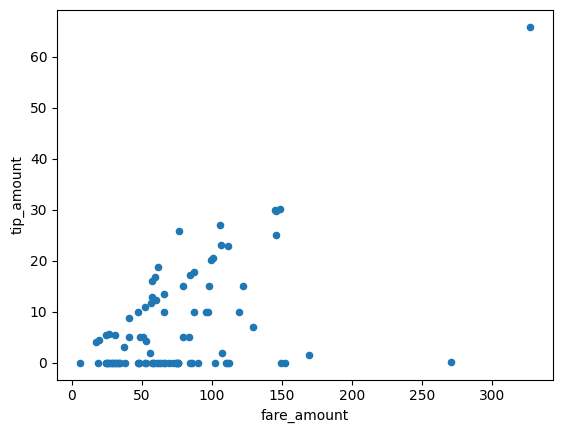

In [21]:
taxi.plot.scatter(x='fare_amount', y='tip_amount')
plt.show()